# I. Introduction

## Backgroud

We, PT Adidaya Fesyen Indonesia, are trying to develop new product and decide to research Man Sock Market at Tokopedia. Before purposing product concept, we need to understand the Man Sock Market to extract information about price for sharpening our Pricing Strategy. Besides, we want to understand the impact of Organic Review for boosting sales. It is need for reducing ads budget and build strong sales without dependency of ads.

## Objective

Attaining 0,01% market share for Man Socks at Tokopedia with defining robust pricing strategy and gaining organic reviews for pushing organic sales within 1 year.

# II. Import Libraries

In [41]:
# Import Libraries 
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# III. Data Loading

## Data Description

This data was obtained by scraping www.tokopedia.com with subproduct filter, Man Shock. This data consist of 327 products. This data was extracted at 1 December 2025.

Collected Data:
- Price
- Location
- Product Rating
- Number of Product Review
- Number of Product Rating
- Units Sold
- Store Rating
- Number of Store Review

## Data Sampling

- Total Population : 123.246 products
- Margin of Error  : 5,41% (CL 95%)
- Number of Sample : 327 Houses

## Web Scraping

```python
data_price=[]
data_location=[]
data_product_rating=[]
data_rating_score=[]
data_units_sold=[]
data_store_rating=[]
data_store_review=[]

driver=webdriver.Firefox()
num_pages=20
for page in range (1, num_pages+1):
    page_url = f"https://www.tokopedia.com/p/fashion-pria/aksesoris-sepatu-pria/kaos-kaki-pria?ob=5&page={page}"
    driver.get(page_url)
    for i in range(3):
            driver.execute_script("window.scrollBy(0, 1080);")
            time.sleep(4)
    # TAHAP 3, HTML READER PREPARATION
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    data_link=[]
    link = soup.find_all('a', {'class':'css-54k5sq'})
    for i in link:
        link_list=i["href"]
        driver.get(link_list)
        for i in range(3):
            driver.execute_script("window.scrollBy(0, 1080);")
            time.sleep(6)
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')

        price=soup.find("div", {"data-testid":"lblPDPDetailProductPrice"}).get_text()
        data_price.append(price)

        loc_location = soup.find("h2", class_="css-793nib-unf-heading e1qvo2ff2")
        location = loc_location.find("b").get_text(strip=True)
        data_location.append(location)

        rating=soup.find("p", {"class":"css-19y0pwk-unf-heading e1qvo2ff8"}).get_text()
        data_product_rating.append(rating)

        sold=soup.find("p",{"data-testid":"lblPDPDetailProductSoldCounter"}).get_text()
        data_units_sold.append(sold)

        rating_score=soup.find("span", {"class":"css-dn7ef3"}).get_text()
        data_rating_score.append(rating_score)
    
        loc_store=soup.find("p", {"class":"css-1dpfpja-unf-heading e1qvo2ff8"})
        loc_elem_store=loc_store.find_all("span")
        store_rating=loc_elem_store[0].get_text()
        store_review=loc_elem_store[1].get_text()
        data_store_rating.append(store_rating)
        data_store_review.append(store_review)

df=pd.DataFrame({"Price":data_price,
                 "Location":data_location,
                 "Rating":data_product_rating,
                 "Review":data_product_rating,
                 "Units Sold":data_units_sold,
                 "Product Rating Score":data_rating_score,
                 "Store Rating":data_store_rating,
                 "Store Review":data_store_review})
df.to_csv("P0M1_rifqi_asyrafi_dataset.csv", index=False)
df
```

## Data Loading from Scraping

In [42]:
# Load Main Dataset
df=pd.read_csv("scrapped_data.csv")
df

,Price,Location,Rating,Review,Units Sold,Product Rating Score,Store Rating,Store Review
0,Rp23.500,Kab. Bogor,19379 rating • 7784 ulasan,19379 rating • 7784 ulasan,Terjual 100 rb+,4.9,4.8,"(8,8 rb)"
1,Rp9.306,Kota Administrasi Jakarta Barat,11364 rating • 2079 ulasan,11364 rating • 2079 ulasan,Terjual 50 rb+,4.9,4.9,"(637,3 rb)"
2,Rp16.000,Kota Administrasi Jakarta Barat,10544 rating • 1874 ulasan,10544 rating • 1874 ulasan,Terjual 50 rb+,4.9,4.9,"(417,8 rb)"
3,Rp10.499,Kota Administrasi Jakarta Barat,9491 rating • 2316 ulasan,9491 rating • 2316 ulasan,Terjual 50 rb+,4.9,4.9,"(132,3 rb)"
4,Rp13.400,Kota Administrasi Jakarta Barat,8345 rating • 1731 ulasan,8345 rating • 1731 ulasan,Terjual 10 rb+,4.9,4.9,"(417,8 rb)"
...,...,...,...,...,...,...,...,...
322,Rp48.800,Kota Bandung,6 rating • 3 ulasan,6 rating • 3 ulasan,Terjual 15,5.0,4.9,"(2,2 rb)"
323,Rp12.725,Kota Bekasi,5332 rating • 1076 ulasan,5332 rating • 1076 ulasan,Terjual 10 rb+,4.9,4.9,"(22,3 rb)"
324,Rp10.400,Kota Administrasi Jakarta Barat,3465 rating • 696 ulasan,3465 rating • 696 ulasan,Terjual 10 rb+,4.9,4.9,"(637,3 rb)"
325,Rp19.800,Kab. Klaten,753 rating • 416 ulasan,753 rating • 416 ulasan,Terjual 2 rb+,4.9,4.9,"(1,1 jt)"


In [43]:
# Load Additional Dataset
df_ad=pd.read_csv("location_data.csv", delimiter=";")
df_ad

,KOTA/KAB,PROVINSI
0,KOTA JAKARTA PUSAT,DKI JAKARTA
1,KOTA JAKARTA UTARA,DKI JAKARTA
2,KOTA JAKARTA BARAT,DKI JAKARTA
3,KOTA JAKARTA TIMUR,DKI JAKARTA
4,KOTA JAKARTA SELATAN,DKI JAKARTA
...,...,...
115,KAB. TANGERANG,BANTEN
116,KOTA TANGERANG,BANTEN
117,KOTA SERANG,BANTEN
118,KOTA CILEGON,BANTEN


In [44]:
# Check data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 327 non-null    object 
 1   Location              327 non-null    object 
 2   Rating                327 non-null    object 
 3   Review                327 non-null    object 
 4   Units Sold            327 non-null    object 
 5   Product Rating Score  327 non-null    float64
 6   Store Rating          327 non-null    float64
 7   Store Review          327 non-null    object 
dtypes: float64(2), object(6)
memory usage: 20.6+ KB


From the information above, we can see that:
1. There are no missing values
2. There are inappropriate data types

# IV. Data Cleaning

In [45]:
# Clean inappropriate characters, data types, and transform numerical columns
df["Price"]=df["Price"].str.replace("Rp","").str.replace(".","").astype(int)
df['Location']=df['Location'].str.replace(" Administrasi", "")
df['Review'] = df['Review'].str.replace("ulasan","").str.split(' ').str[3].astype(int)
df['Rating']=df['Rating'].str.split(' ').str[0].astype(int)
df['Units Sold']=df['Units Sold'].str.replace("Terjual ","").str.replace(" rb+","000").str.replace("+","").astype(int)
df['Store Review']=df['Store Review'].str.replace("(","").str.replace(")","").str.replace(",",".",regex=False).str.replace(" rb","*1000", regex=False).str.replace(" jt","*1000000", regex=False).apply(eval).astype(int)
df

,Price,Location,Rating,Review,Units Sold,Product Rating Score,Store Rating,Store Review
0,23500,Kab. Bogor,19379,7784,100000,4.9,4.8,8800
1,9306,Kota Jakarta Barat,11364,2079,50000,4.9,4.9,637300
2,16000,Kota Jakarta Barat,10544,1874,50000,4.9,4.9,417800
3,10499,Kota Jakarta Barat,9491,2316,50000,4.9,4.9,132300
4,13400,Kota Jakarta Barat,8345,1731,10000,4.9,4.9,417800
...,...,...,...,...,...,...,...,...
322,48800,Kota Bandung,6,3,15,5.0,4.9,2200
323,12725,Kota Bekasi,5332,1076,10000,4.9,4.9,22300
324,10400,Kota Jakarta Barat,3465,696,10000,4.9,4.9,637300
325,19800,Kab. Klaten,753,416,2000,4.9,4.9,1100000


Data Cleaning
1. Price        : Removing "Rp" and "." with Data Type Transformation to Integer
2. Location     : Removing " Administrasi" for Shortening String
3. Review       : Extracting Rating Total from String and Data Type Transformation to Integer
4. Rating       : Extracting Review Total from String and Data Type Transformation to Integer
5. Units Sold   : Removing "Terjual ", and Transforming " rb+" to 000 with Data Type Transformation to Integer
6. Store Review : Transforming Data from String to be Correct Integer Data Type

In [46]:
# Check Data Summary
df.describe()

,Price,Rating,Review,Units Sold,Product Rating Score,Store Rating,Store Review
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,3.270000e+02
mean,25042.461774,2274.311927,853.311927,11162.492355,4.885933,4.874006,1.894916e+05
std,43442.705238,2198.103245,1091.183255,14385.938099,0.055254,0.060394,3.714421e+05
min,2288.000000,3.000000,0.000000,11.000000,4.700000,4.600000,2.280000e+02
25%,8949.000000,962.500000,222.000000,5000.000000,4.900000,4.900000,1.400000e+04
50%,12999.000000,1410.000000,497.000000,9000.000000,4.900000,4.900000,3.280000e+04
75%,23500.000000,2720.000000,1001.000000,10000.000000,4.900000,4.900000,1.460000e+05
max,579000.000000,19379.000000,7784.000000,100000.000000,5.000000,5.000000,3.500000e+06


In [47]:
# Set additional dataset
df_ad=df_ad[["KOTA/KAB","PROVINSI"]]

# Change title case to suit with main dataset
df_ad["KOTA/KAB"]=df_ad["KOTA/KAB"].str.title()
df_ad

,KOTA/KAB,PROVINSI
0,Kota Jakarta Pusat,DKI JAKARTA
1,Kota Jakarta Utara,DKI JAKARTA
2,Kota Jakarta Barat,DKI JAKARTA
3,Kota Jakarta Timur,DKI JAKARTA
4,Kota Jakarta Selatan,DKI JAKARTA
...,...,...
115,Kab. Tangerang,BANTEN
116,Kota Tangerang,BANTEN
117,Kota Serang,BANTEN
118,Kota Cilegon,BANTEN


In [48]:
# Merge data from additional dataset to main dataset
df = pd.merge(df,df_ad,left_on='Location',right_on='KOTA/KAB',how='left')
df= df.drop(['KOTA/KAB'],axis=1)
df=df.rename(columns={'PROVINSI':"Province"})
df=df.fillna("DKI JAKARTA")
df

,Price,Location,Rating,Review,Units Sold,Product Rating Score,Store Rating,Store Review,Province
0,23500,Kab. Bogor,19379,7784,100000,4.9,4.8,8800,JAWA BARAT
1,9306,Kota Jakarta Barat,11364,2079,50000,4.9,4.9,637300,DKI JAKARTA
2,16000,Kota Jakarta Barat,10544,1874,50000,4.9,4.9,417800,DKI JAKARTA
3,10499,Kota Jakarta Barat,9491,2316,50000,4.9,4.9,132300,DKI JAKARTA
4,13400,Kota Jakarta Barat,8345,1731,10000,4.9,4.9,417800,DKI JAKARTA
...,...,...,...,...,...,...,...,...,...
322,48800,Kota Bandung,6,3,15,5.0,4.9,2200,JAWA BARAT
323,12725,Kota Bekasi,5332,1076,10000,4.9,4.9,22300,JAWA BARAT
324,10400,Kota Jakarta Barat,3465,696,10000,4.9,4.9,637300,DKI JAKARTA
325,19800,Kab. Klaten,753,416,2000,4.9,4.9,1100000,JAWA TENGAH


In [49]:
# Check final dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 327 non-null    int32  
 1   Location              327 non-null    object 
 2   Rating                327 non-null    int32  
 3   Review                327 non-null    int32  
 4   Units Sold            327 non-null    int32  
 5   Product Rating Score  327 non-null    float64
 6   Store Rating          327 non-null    float64
 7   Store Review          327 non-null    int32  
 8   Province              327 non-null    object 
dtypes: float64(2), int32(5), object(2)
memory usage: 16.7+ KB


# V. Exploration and Analysis

## Initial Analysis

In [50]:
# Check central metrics for numerical columns
df.describe()

,Price,Rating,Review,Units Sold,Product Rating Score,Store Rating,Store Review
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,3.270000e+02
mean,25042.461774,2274.311927,853.311927,11162.492355,4.885933,4.874006,1.894916e+05
std,43442.705238,2198.103245,1091.183255,14385.938099,0.055254,0.060394,3.714421e+05
min,2288.000000,3.000000,0.000000,11.000000,4.700000,4.600000,2.280000e+02
25%,8949.000000,962.500000,222.000000,5000.000000,4.900000,4.900000,1.400000e+04
50%,12999.000000,1410.000000,497.000000,9000.000000,4.900000,4.900000,3.280000e+04
75%,23500.000000,2720.000000,1001.000000,10000.000000,4.900000,4.900000,1.460000e+05
max,579000.000000,19379.000000,7784.000000,100000.000000,5.000000,5.000000,3.500000e+06


From the information above, we can take insights:
1. Average of man sock price is Rp.25.042
2. Average of number of product ratings is 2274 ratings
3. Average of number of product reviews is 853 reviews
4. Average of units sold is 11.162 units
5. Median of product ratings is 4.9 star
6. Median of store ratings is 4.9 star
7. Average of number of store reviews is 189.491 reviews
8. Man sock price is ranging from Rp.2.288 to Rp.579.000

In [51]:
# Transform variable for deeper analysis

# Create "Product Score"
df["Product Score"]=(df["Rating"]+df["Review"])*df["Product Rating Score"].astype(int)

# Create "Store Score"
df["Store Score"]=df["Store Rating"]*df["Store Review"].astype(int)

# Drop unnecessary columns
df=df.drop(["Location", "Rating","Review", "Product Rating Score", "Store Rating", "Store Review"], axis=1)

# Rename column
df=df.rename(columns={"Province":"Location"})
df

,Price,Units Sold,Location,Product Score,Store Score
0,23500,100000,JAWA BARAT,108652,42240.0
1,9306,50000,DKI JAKARTA,53772,3122770.0
2,16000,50000,DKI JAKARTA,49672,2047220.0
3,10499,50000,DKI JAKARTA,47228,648270.0
4,13400,10000,DKI JAKARTA,40304,2047220.0
...,...,...,...,...,...
322,48800,15,JAWA BARAT,45,10780.0
323,12725,10000,JAWA BARAT,25632,109270.0
324,10400,10000,DKI JAKARTA,16644,3122770.0
325,19800,2000,JAWA TENGAH,4676,5390000.0


Explanation of Code Above
1. Replace Location Column with Province Column for Better Grouping.
2. Defining New Column "Product Score" Plusing "Product Rating" and "Product Review" Multiplicated with "Product Rating Score" for Having One Numerical Data Representing One Product. (Note : Actually, Product Review is a part of Product Rating, but we make it more weighted 2 times)
3. Defining New Column "Store Score" Multiplicating "Store Rating" with "Store Review" for Having One Numerical Data Representing One Store.

Explanation of Grouping Below

For segmenting market condition, this project categorize 'Price', 'Product Score' and 'Store Score' using quantile binning. It chose for easy interpretation.

In [52]:
# Make price group
q1_p = df["Price"].quantile(0.25)
q2_p = df["Price"].quantile(0.5)
q3_p = df["Price"].quantile(0.75)

conditions = [df["Price"] <= q1_p,
              (df["Price"] > q1_p) & (df["Price"] <= q2_p),
              (df["Price"] > q2_p) & (df["Price"] <= q3_p)]
choices = ["Low", "Low-Medium", "Medium"]

df["Price Cat"] = np.select(conditions, 
                            choices, 
                            default="High")
min = df['Price'].min()
max = df['Price'].max()

print(f'Low Range: Rp.{min} - Rp.{q1_p}')
print(f'Low-Medium Range: Rp.{q1_p} - Rp.{q2_p}')
print(f'Medium Range: Rp.{q2_p} - Rp.{q3_p}')
print(f'High Range: Rp.{q3_p} - Rp.{max}')

Low Range: Rp.2288 - Rp.8949.0
Low-Medium Range: Rp.8949.0 - Rp.12999.0
Medium Range: Rp.12999.0 - Rp.23500.0
High Range: Rp.23500.0 - Rp.579000


In [53]:
# Make product score group
q1_ps = df["Product Score"].quantile(0.25)
q2_ps = df["Product Score"].quantile(0.5)
q3_ps = df["Product Score"].quantile(0.75)

conditions = [df["Product Score"] <= q1_p,
              (df["Product Score"] > q1_p) & (df["Product Score"] <= q2_p),
              (df["Product Score"] > q2_p) & (df["Product Score"] <= q3_p)]
choices = ["Low", "Low-Medium", "Medium"]

df["Product Score Cat"] = np.select(conditions, 
                            choices, 
                            default="High")

min = df['Product Score'].min()
max = df['Product Score'].max()

print(f'Low Range: {min} - {q1_ps}')
print(f'Low-Medium Range: {q1_ps} - {q2_ps}')
print(f'Medium Range: {q2_ps} - {q3_ps}')
print(f'High Range: {q3_ps} - {max}')

Low Range: 20 - 4872.0
Low-Medium Range: 4872.0 - 8068.0
Medium Range: 8068.0 - 14764.0
High Range: 14764.0 - 108652


In [54]:
# Make store score group
q1_ss= df["Store Score"].quantile(0.25)
q2_ss = df["Store Score"].quantile(0.5)
q3_ss = df["Store Score"].quantile(0.75)

conditions = [df["Store Score"] <= q1_p,
              (df["Store Score"] > q1_p) & (df["Store Score"] <= q2_p),
              (df["Store Score"] > q2_p) & (df["Store Score"] <= q3_p)]
choices = ["Low", "Low-Medium", "Medium"]

df["Store Score Cat"] = np.select(conditions, 
                            choices, 
                            default="High")

min = df['Store Score'].min()
max = df['Store Score'].max()

print(f'Low Range: {min} - {q1_ss}')
print(f'Low-Medium Range: {q1_ss} - {q2_ss}')
print(f'Medium Range: {q2_ss} - {q3_ss}')
print(f'High Range: {q3_ss} - {max}')

Low Range: 1117.2 - 67200.0
Low-Medium Range: 67200.0 - 154160.0
Medium Range: 154160.0 - 708435.0
High Range: 708435.0 - 16800000.0


In [55]:
# Display Dataset
df

,Price,Units Sold,Location,Product Score,Store Score,Price Cat,Product Score Cat,Store Score Cat
0,23500,100000,JAWA BARAT,108652,42240.0,Medium,High,High
1,9306,50000,DKI JAKARTA,53772,3122770.0,Low-Medium,High,High
2,16000,50000,DKI JAKARTA,49672,2047220.0,Medium,High,High
3,10499,50000,DKI JAKARTA,47228,648270.0,Low-Medium,High,High
4,13400,10000,DKI JAKARTA,40304,2047220.0,Medium,High,High
...,...,...,...,...,...,...,...,...
322,48800,15,JAWA BARAT,45,10780.0,High,Low,Low-Medium
323,12725,10000,JAWA BARAT,25632,109270.0,Low-Medium,High,High
324,10400,10000,DKI JAKARTA,16644,3122770.0,Low-Medium,Medium,High
325,19800,2000,JAWA TENGAH,4676,5390000.0,Medium,Low,High


In [56]:
df.to_csv('processed_data.csv', index=False)

## Group Distribution Analysis

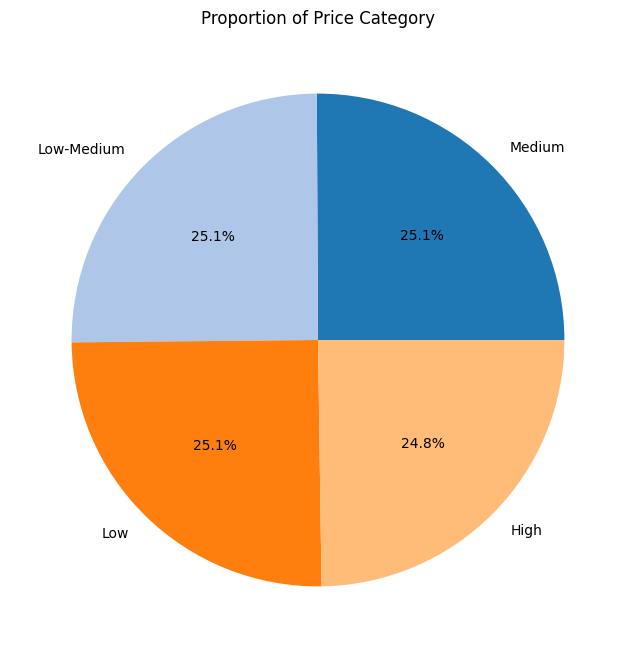

In [57]:
# Create pie chart for category proportion
data_counts = df['Price Cat'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(data_counts, 
        labels = data_counts.index, 
        colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78'], 
        autopct='%1.1f%%')

plt.title('Proportion of Price Category')
plt.show()

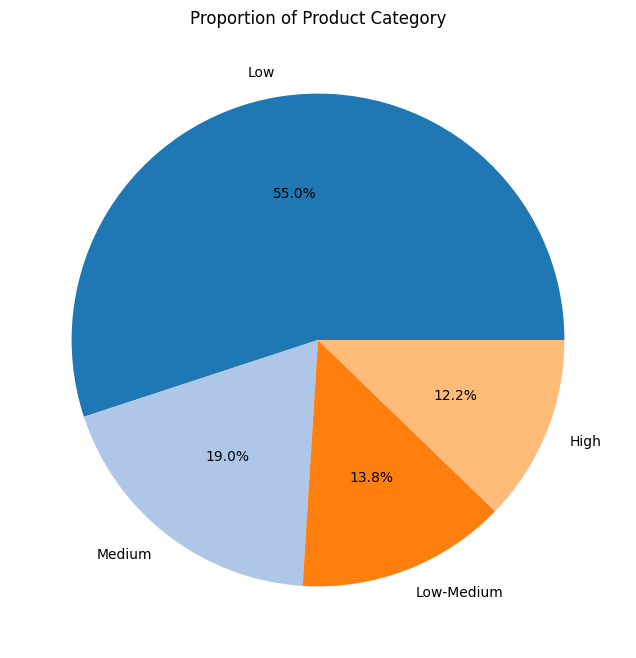

In [58]:
# Create pie chart for category proportion
data_counts = df['Product Score Cat'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(data_counts, 
        labels = data_counts.index, 
        colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78'], 
        autopct='%1.1f%%')

plt.title('Proportion of Product Category')
plt.show()

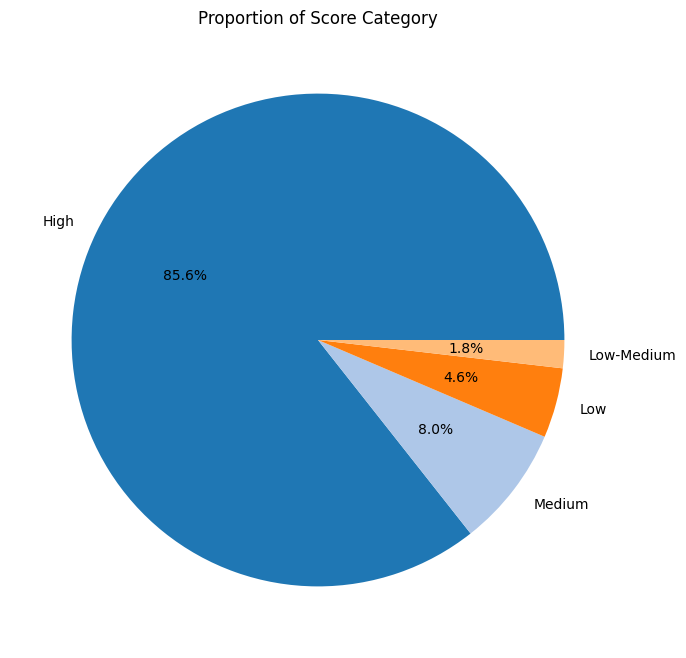

In [59]:
# Create pie chart for category proportion
data_counts = df['Store Score Cat'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(data_counts, 
        labels = data_counts.index,
        colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78'], 
        autopct='%1.1f%%')

plt.title('Proportion of Score Category')
plt.show()

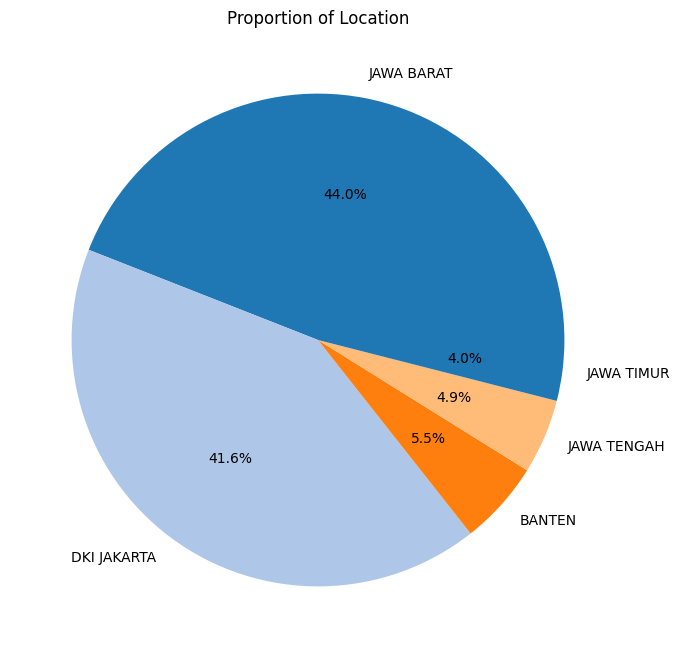

In [60]:
# Create pie chart for location proportion
data_counts = df['Location'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(data_counts, 
        labels = data_counts.index, 
        colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78'], 
        autopct='%1.1f%%')

plt.title('Proportion of Location')
plt.show()

In [61]:
# Median price for eact price group
df.groupby('Price Cat')['Price'].median()

Price Cat
High          40000.0
Low            8000.0
Low-Medium    10999.5
Medium        18420.0
Name: Price, dtype: float64

In [62]:
# Median price for eact price group
df.groupby('Product Score Cat')['Price'].median()

Product Score Cat
High          12499.0
Low           14710.0
Low-Medium    15000.0
Medium        12499.5
Name: Price, dtype: float64

## Correlation Analysis

In [63]:
# Correlation Overview
df[["Units Sold","Price","Product Score","Store Score"]].corr('spearman')

,Units Sold,Price,Product Score,Store Score
Units Sold,1.000000,-0.442698,0.818651,-0.042144
Price,-0.442698,1.000000,-0.154638,-0.241226
Product Score,0.818651,-0.154638,1.000000,0.003826
Store Score,-0.042144,-0.241226,0.003826,1.000000


rho-correlation_a: -0.44, p-value: 3.9810902235160015e-17


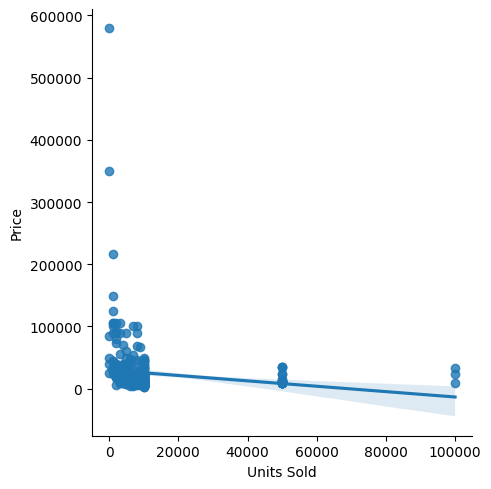

In [64]:
# Correlation between Units Sold and Price
corr_rho_a, pval_s_a = stats.spearmanr(df["Units Sold"], df["Price"])
print(f"rho-correlation_a: {corr_rho_a:.2f}, p-value: {pval_s_a}")

sns.lmplot(data=df,x='Units Sold', y='Price')

From the information above, we can take insights:
1. There is moderate negative correlation from the p-value and the graph
2. It means that the cheaper the price, the more units sold with moderate slope.

rho-correlation_b: 0.82, p-value: 2.818131310633711e-80


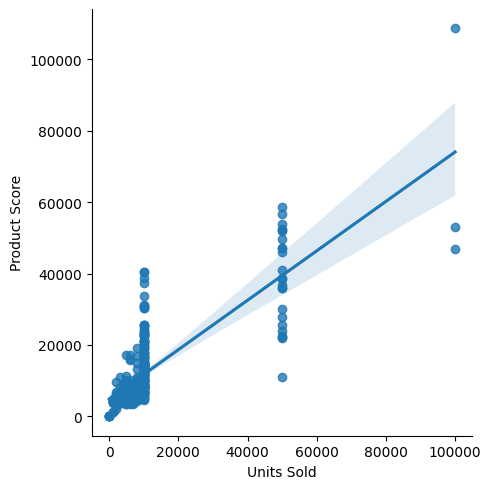

In [65]:
# Correlation between Units Sold and Product Score
corr_rho_b, pval_s_b = stats.spearmanr(df["Units Sold"], df["Product Score"])
print(f"rho-correlation_b: {corr_rho_b:.2f}, p-value: {pval_s_b}")

sns.lmplot(data=df,x='Units Sold', y='Product Score')

From the information above, we can take insights:
1. There is very strong positive correlation from the p-value and the graph
2. It means that the more product score, the more units sold with strong slope.

rho-correlation_b: -0.04, p-value: 0.4475442954892058


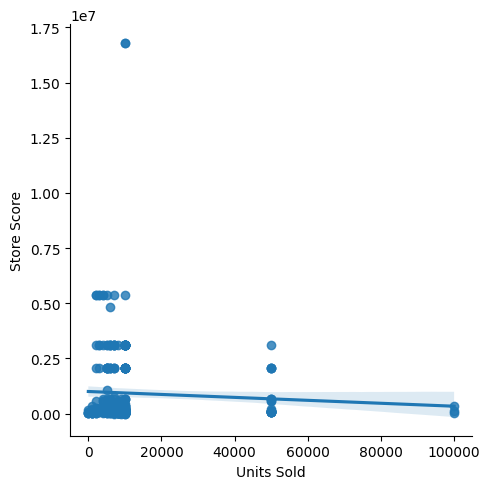

In [66]:
# Correlation between Units Sold and Store Score
corr_rho_c, pval_s_c = stats.spearmanr(df["Units Sold"], df["Store Score"])
print(f"rho-correlation_b: {corr_rho_c:.2f}, p-value: {pval_s_c}")

sns.lmplot(data=df,x='Units Sold', y='Store Score')

From the information above, we can take insights:
1. There is very weak negative correlation from the p-value and the graph
2. It means that the more store score, the more units sold but with weak correlation.

## Units Sold Relation

Text(0, 0.5, 'Average of Units Sold')

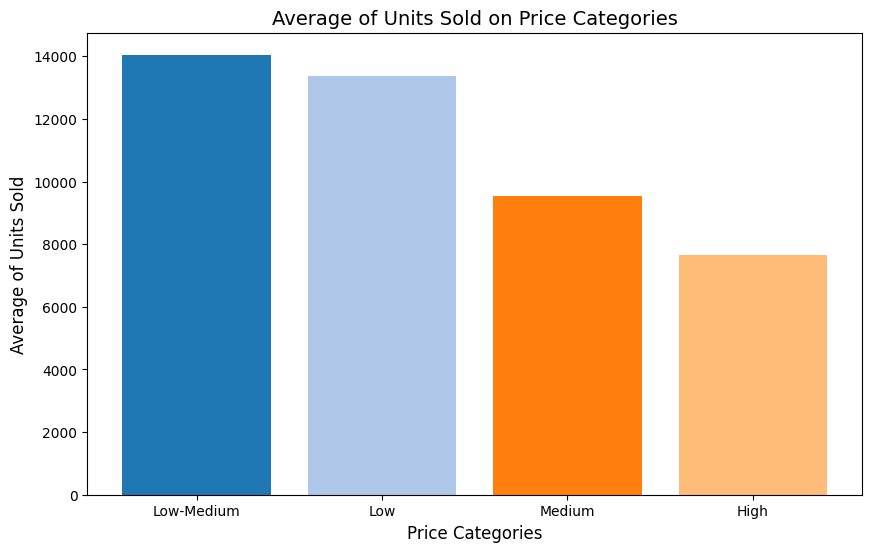

In [67]:
# Average of Units Sold on Price Categories
bar_price=pd.DataFrame(round(df.groupby("Price Cat")["Units Sold"].agg("mean").sort_values(ascending=False),3))
bar_price

categories = bar_price.index
mean_values = bar_price["Units Sold"]

plt.figure(figsize=(10, 6))
plt.bar(categories, mean_values, color = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78'])

plt.title('Average of Units Sold on Price Categories', fontsize=14)
plt.xlabel('Price Categories', fontsize=12)
plt.ylabel('Average of Units Sold', fontsize=12)

From the information above, we can see the greater average units sold is at Low-Medium Price Categories, ranging from Rp.8.949 to Rp.12.999

Text(0, 0.5, 'Average of Units Sold')

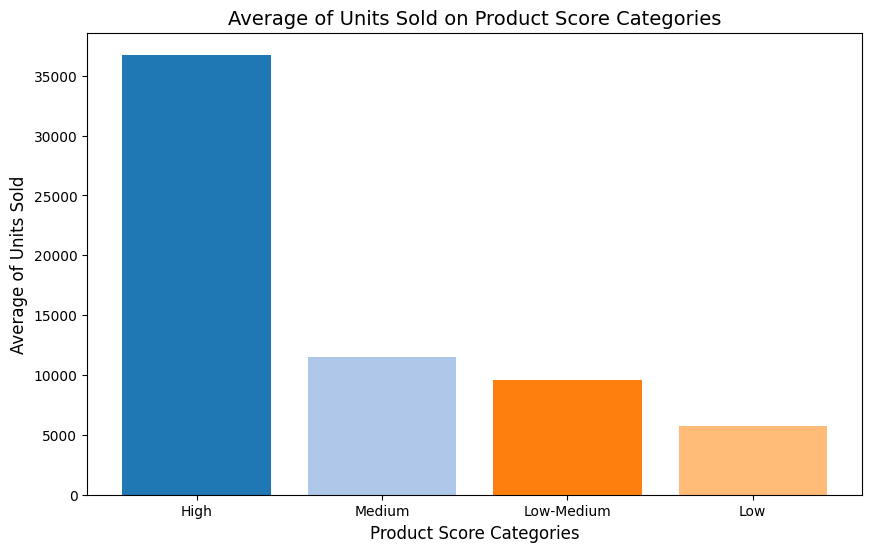

In [68]:
# Average of Units Sold on Product Score Categories
bar_product_score=pd.DataFrame(round(df.groupby("Product Score Cat")["Units Sold"].agg("mean").sort_values(ascending=False),3))
bar_product_score

categories = bar_product_score.index
mean_values = bar_product_score["Units Sold"]

plt.figure(figsize=(10, 6))
plt.bar(categories, mean_values, color = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78'])

plt.title('Average of Units Sold on Product Score Categories', fontsize=14)
plt.xlabel('Product Score Categories', fontsize=12)
plt.ylabel('Average of Units Sold', fontsize=12)

From the information above, we can see the greater average units sold is at High Product Score Categories having more than 3.022 ratings (calculated from 14.764 divided with 4,885 star)

Text(0, 0.5, 'Average of Units Sold')

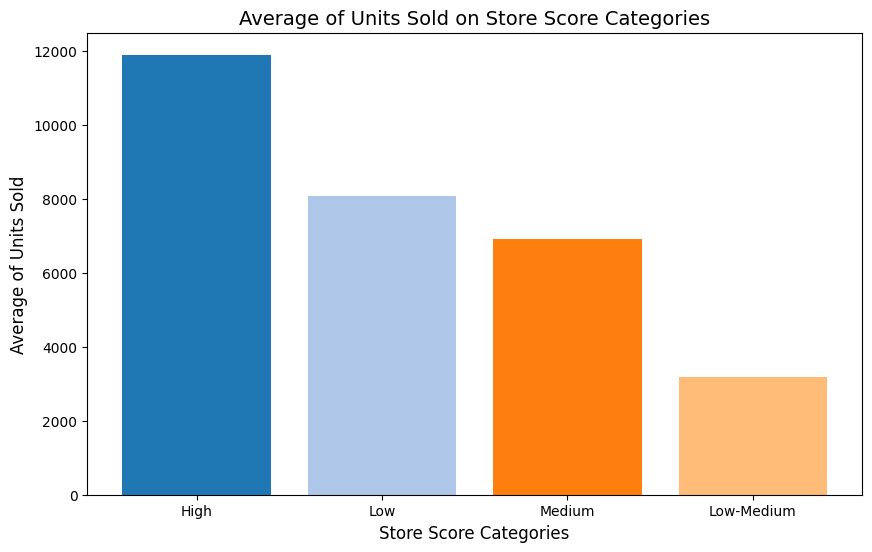

In [69]:
# Average of Units Sold on Store Score Categories
bar_store_score=pd.DataFrame(round(df.groupby("Store Score Cat")["Units Sold"].agg("mean").sort_values(ascending=False),3))
bar_store_score

categories = bar_store_score.index
mean_values = bar_store_score["Units Sold"]

plt.figure(figsize=(10, 6))
plt.bar(categories, mean_values, color = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78'])

plt.title('Average of Units Sold on Store Score Categories', fontsize=14)
plt.xlabel('Store Score Categories', fontsize=12)
plt.ylabel('Average of Units Sold', fontsize=12)

From the information above, we can see the greater average units sold is at High Store Score Categories having more than 145,349 reviews (calculated from 708.435 divided with 4,874 star)

Text(0, 0.5, 'Average of Units Sold')

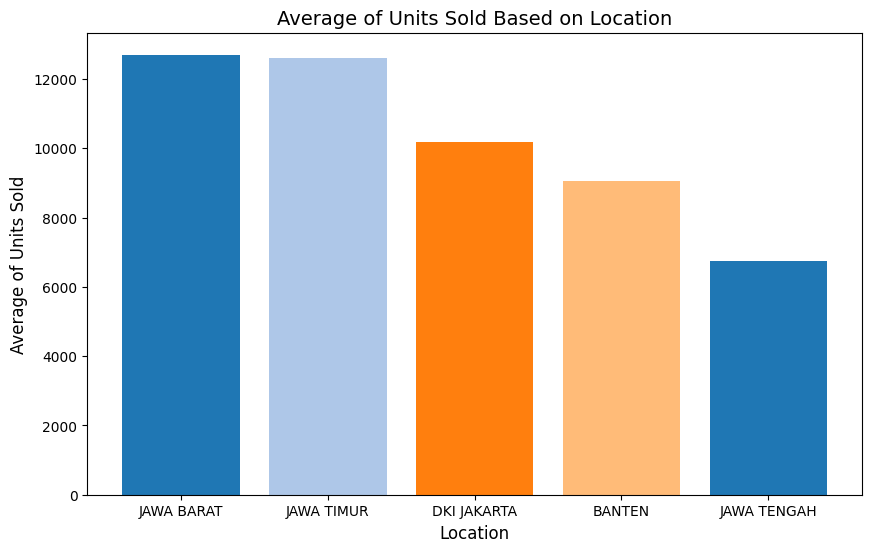

In [70]:
# Average of Units Sold on Location Score Categories
bar_location=pd.DataFrame(round(df.groupby("Location")["Units Sold"].agg("mean").sort_values( ascending=False),3))
bar_location

categories = bar_location.index
mean_values = bar_location["Units Sold"]

plt.figure(figsize=(10, 6))
plt.bar(categories, mean_values, color = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78'])

plt.title('Average of Units Sold Based on Location', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Average of Units Sold', fontsize=12)

From the information above, we can see the greater average units sold is at West Java and East Java with slight difference.

## Price Relation

Text(0, 0.5, 'Average of Price')

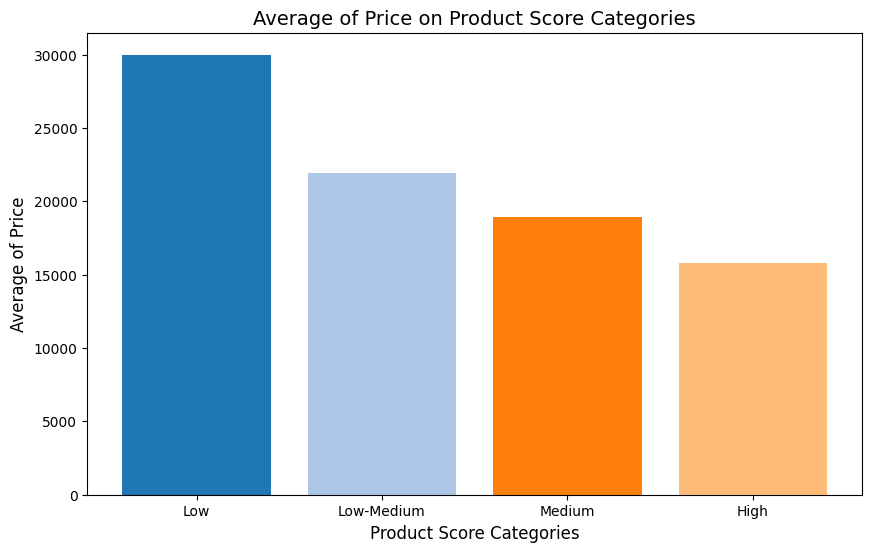

In [71]:
# Average of Units Sold on Product Score Categories
bar_product_score=pd.DataFrame(round(df.groupby("Product Score Cat")["Price"].agg("mean").sort_values(ascending=False),3))
bar_product_score

categories = bar_product_score.index
mean_values = bar_product_score["Price"]

plt.figure(figsize=(10, 6))
plt.bar(categories, mean_values, color = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78'])

plt.title('Average of Price on Product Score Categories', fontsize=14)
plt.xlabel('Product Score Categories', fontsize=12)
plt.ylabel('Average of Price', fontsize=12)

Text(0, 0.5, 'Average of Price')

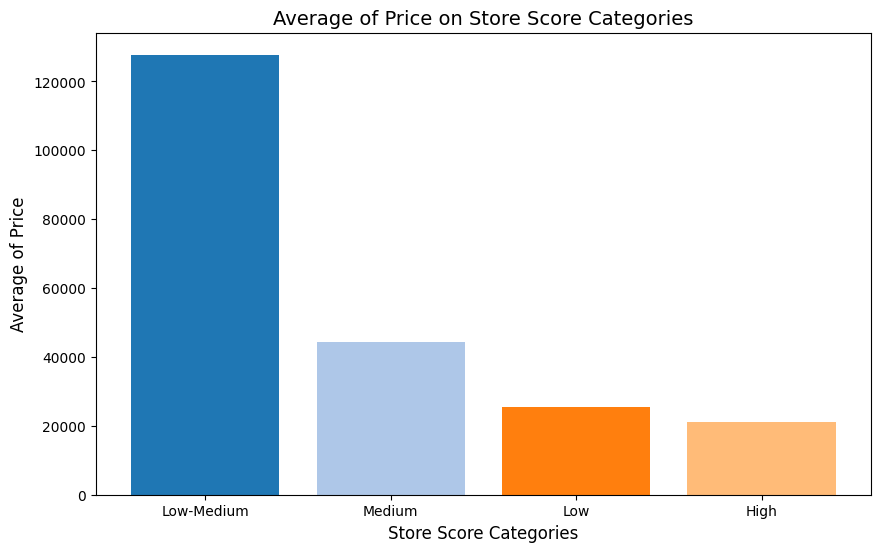

In [72]:
# Average of Units Sold on Store Score Categories
bar_product_score=pd.DataFrame(round(df.groupby("Store Score Cat")["Price"].agg("mean").sort_values(ascending=False),3))
bar_product_score

categories = bar_product_score.index
mean_values = bar_product_score["Price"]

plt.figure(figsize=(10, 6))
plt.bar(categories, mean_values, color = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78'])

plt.title('Average of Price on Store Score Categories', fontsize=14)
plt.xlabel('Store Score Categories', fontsize=12)
plt.ylabel('Average of Price', fontsize=12)

Text(0, 0.5, 'Average of Price')

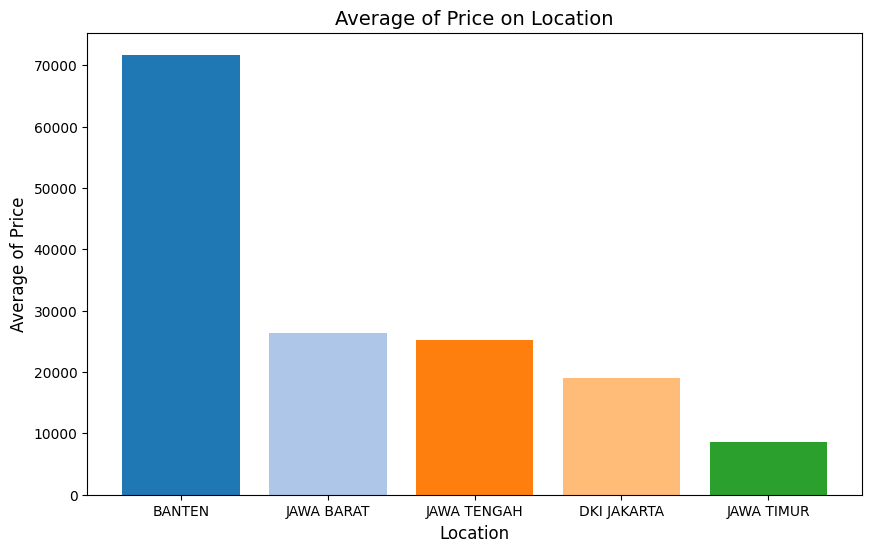

In [73]:
# Average of Units Sold on Store Score Categories
bar_product_score=pd.DataFrame(round(df.groupby("Location")["Price"].agg("mean").sort_values(ascending=False),3))
bar_product_score

categories = bar_product_score.index
mean_values = bar_product_score["Price"]

plt.figure(figsize=(10, 6))
plt.bar(categories, mean_values, color = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c'])

plt.title('Average of Price on Location', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Average of Price', fontsize=12)

## Hypothesis Testing

In [74]:
# Hypothesis Testing for Price Category
'''
H0 = There are no significantly difference of units sold among four price categories
H1 = There are significantly difference of units sold among four price categories
'''
low = df["Units Sold"][(df["Price Cat"]=='Low')]
low_medium = df["Units Sold"][(df["Price Cat"]=='Low-Medium')]
medium = df["Units Sold"][(df["Price Cat"]=='Medium')]
high = df["Units Sold"][(df["Price Cat"]=='High')]

res = stats.f_oneway(low, low_medium, medium, high)
print('P-value:',res.pvalue)

P-value: 0.011023651494448753


From testing each price categories to see the significancy to units sold, H0 is rejected because the p-value is less than 0.05. It means that there are significant difference among categories. So we should consider to take the best price category.

In [75]:
# Hypothesis Testing for Product Score Category
'''
H0 = There are no significantly difference of units sold among four product score categories
H1 = There are significantly difference of units sold among four product score categories
'''
low = df["Units Sold"][(df["Product Score Cat"]=='Low')]
low_medium = df["Units Sold"][(df["Product Score Cat"]=='Low-Medium')]
medium = df["Units Sold"][(df["Product Score Cat"]=='Medium')]
high = df["Units Sold"][(df["Product Score Cat"]=='High')]

res = stats.f_oneway(low, low_medium, medium, high)
print('P-value:',res.pvalue)

P-value: 4.772761704563479e-44


From testing each product score categories to see the significancy to units sold, H0 is rejected because the p-value is less than 0.05. It means that there are significant difference among categories. So we should consider to grow our product ratings for getting higher sales.

In [76]:
# Hypothesis Testing for Store Score Category
'''
H0 = There are no significantly difference of units sold among four store score categories
H1 = There are significantly difference of units sold among four store score categories
'''
low = df["Units Sold"][(df["Store Score Cat"]=='Low')]
low_medium = df["Units Sold"][(df["Store Score Cat"]=='Low-Medium')]
medium = df["Units Sold"][(df["Store Score Cat"]=='Medium')]
high = df["Units Sold"][(df["Store Score Cat"]=='High')]

res = stats.f_oneway(low, low_medium, medium, high)
print('P-value:',res.pvalue)

P-value: 0.13703600005620784


From testing each product score categories to see the significancy to units sold, H0 is accepted because the p-value is more than 0.05. It means that there are no significant difference among categories. So our store review is not really important to be boosted for getting higher sales

## Market Size

In [77]:
# Serviaceable Adressable Market of Each Price Group
display(df.groupby('Price Cat')['Units Sold'].sum())

# Serviaceable Adressable Market
print(f'Total SAM at Tokopedia is {df["Units Sold"].sum()}')

Price Cat
High           621135
Low           1095000
Low-Medium    1152000
Medium         782000
Name: Units Sold, dtype: int32

Total SAM at Tokopedia is 3650135
